In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

### Licitação:


In [2]:
dados_licitacao = pd.read_csv ('./2018/licitacao.csv', sep=',', encoding='UTF-8')
dados_licitacao.head()

C:\Users\Lucas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (52,53,54,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_COMISSAO,ANO_COMISSAO,TP_COMISSAO,NR_PROCESSO,ANO_PROCESSO,...,TP_DOCUMENTO_FORNECEDOR,NR_DOCUMENTO_FORNECEDOR,TP_DOCUMENTO_VENCEDOR,NR_DOCUMENTO_VENCEDOR,VL_HOMOLOGADO,BL_GERA_DESPESA,DS_OBSERVACAO,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA,BL_COMPARTILHADA
0,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,82.0,2018,PRP,26258.0,2018.0,G,17685,2018.0,...,NaN,NaN,J,07024978000132,89000.0,S,NaN,NaN,NaN,N
1,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,54.0,2018,PRP,26258.0,2018.0,G,10315,2018.0,...,NaN,NaN,J,05229392000189,1560000.0,S,NaN,NaN,NaN,N
2,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,90.0,2018,PRP,26258.0,2018.0,G,18979,2018.0,...,NaN,NaN,J,87822110000117,210000.0,S,NaN,NaN,NaN,N
3,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,11.0,2018,PRP,25505.0,2017.0,G,2679,2018.0,...,NaN,NaN,J,87822110000117,120000.0,S,NaN,NaN,NaN,N
4,45003,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,43.0,2018,PRP,25505.0,2017.0,G,8059,2018.0,...,NaN,NaN,J,87822110000117,236925.0,S,NaN,NaN,NaN,N


- Verificação dos nomes das colunas do dataframe

In [3]:
dados_licitacao.columns.values

array(['CD_ORGAO', 'NM_ORGAO', 'NR_LICITACAO', 'ANO_LICITACAO',
       'CD_TIPO_MODALIDADE', 'NR_COMISSAO', 'ANO_COMISSAO', 'TP_COMISSAO',
       'NR_PROCESSO', 'ANO_PROCESSO', 'TP_OBJETO', 'CD_TIPO_FASE_ATUAL',
       'TP_LICITACAO', 'TP_NIVEL_JULGAMENTO', 'DT_AUTORIZACAO_ADESAO',
       'TP_CARACTERISTICA_OBJETO', 'TP_NATUREZA', 'TP_REGIME_EXECUCAO',
       'BL_PERMITE_SUBCONTRATACAO', 'TP_BENEFICIO_MICRO_EPP',
       'TP_FORNECIMENTO', 'TP_ATUACAO_REGISTRO', 'NR_LICITACAO_ORIGINAL',
       'ANO_LICITACAO_ORIGINAL', 'NR_ATA_REGISTRO_PRECO',
       'DT_ATA_REGISTRO_PRECO', 'PC_TAXA_RISCO', 'TP_EXECUCAO',
       'TP_DISPUTA', 'TP_PREQUALIFICACAO', 'BL_INVERSAO_FASES',
       'TP_RESULTADO_GLOBAL', 'CNPJ_ORGAO_GERENCIADOR',
       'NM_ORGAO_GERENCIADOR', 'DS_OBJETO', 'CD_TIPO_FUNDAMENTACAO',
       'NR_ARTIGO', 'DS_INCISO', 'DS_LEI', 'DT_INICIO_INSCR_CRED',
       'DT_FIM_INSCR_CRED', 'DT_INICIO_VIGEN_CRED', 'DT_FIM_VIGEN_CRED',
       'VL_LICITACAO', 'BL_ORCAMENTO_SIGILOSO',
       'BL

- Obter informações sobre cada coluna e seu tipo

In [4]:
dados_licitacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73112 entries, 0 to 73111
Data columns (total 61 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CD_ORGAO                     73112 non-null  int64  
 1   NM_ORGAO                     73112 non-null  object 
 2   NR_LICITACAO                 73112 non-null  float64
 3   ANO_LICITACAO                73112 non-null  int64  
 4   CD_TIPO_MODALIDADE           73112 non-null  object 
 5   NR_COMISSAO                  46762 non-null  float64
 6   ANO_COMISSAO                 46762 non-null  float64
 7   TP_COMISSAO                  46762 non-null  object 
 8   NR_PROCESSO                  73050 non-null  object 
 9   ANO_PROCESSO                 73048 non-null  float64
 10  TP_OBJETO                    73112 non-null  object 
 11  CD_TIPO_FASE_ATUAL           73112 non-null  object 
 12  TP_LICITACAO                 73112 non-null  object 
 13  TP_NIVEL_JULGAME

- Verificação do tamanho das linhas e colunas

In [5]:
dados_licitacao.shape

(73112, 61)

- Separação das colunas importantes para a criação de um novo dataframe

In [6]:
col_licitacao = ['CD_ORGAO', 'NR_LICITACAO','TP_OBJETO', 'DS_OBJETO']

licitacao_df = dados_licitacao.filter(items = col_licitacao)

- Como recomendado, em relação a coluna *'TP_OBJETO'*, utilizou-se apenas as linhas cujo tipo de objeto = *COM* (compras)

In [7]:
licitacao_df = licitacao_df[(licitacao_df.TP_OBJETO == 'COM')]

objeto = licitacao_df.groupby(by=['DS_OBJETO'])

licitacao_df.head()

,CD_ORGAO,NR_LICITACAO,TP_OBJETO,DS_OBJETO
2,45003,90.0,COM,Aquisição de 60.000 kg (sessenta mil quilogram...
3,45003,11.0,COM,Aquisição de 40.000 kg (quarenta mil quilogram...
4,45003,43.0,COM,Aquisição de 40.500kg (quarenta mil e quinhent...
5,45003,10.0,COM,Aquisição de 65 t (sessenta e cindo toneladas)...
7,45003,66.0,COM,"Aquisição de baterias estacionárias, para subs..."


- Remoção da coluna *'TP_OBJETO'*

In [8]:
licitacao_df.drop(['TP_OBJETO'], axis = 1, inplace = True)

- Verificação detalhada da coluna DS_OBJETO.

*Para melhor processamento, fora criado um dataframe apenas com a coluna em questão e a coluna CD_ORGAO*

In [9]:
verification_df = licitacao_df[['CD_ORGAO','DS_OBJETO']]
ProfileReport(verification_df)

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- Verificação dos objetos mais vendidos no dataframe de licitação

In [10]:
licitacao_df['DS_OBJETO'].value_counts().head(15)


AQUISIÇÃO DE BENS DA(S) FAMÍLIA(S):0035-EQUIPAMENTOS P/INFORMATICA;                               62
Material                                                                                          53
Aquisição de livros                                                                               39
AQUISIÇÃO DE BENS DA(S) FAMÍLIA(S):0595-VEICULOS;                                                 32
AQUISIÇÃO DE BENS DA(S) FAMÍLIA(S):0870-EQUIPAMENTOS/MATERIAIS MEDICO-HOSPITALARES/ENFERMAGEM;    32
AQUISIÇÃO DE BENS DA(S) FAMÍLIA(S):0515-EQUIPAMENTOS/MATERIAIS DE SEGURANCA E PROTECAO;           27
AQUISIÇÃO DE MEDICAMENTOS                                                                         24
AQUISIÇÃO DE TUBOS DE CONCRETO                                                                    22
...                                                                                               21
AQUISIÇÃO DE MERENDA ESCOLAR                                                               

- Verificação da existência de algum dado nulo

In [11]:
licitacao_df.isna().sum()

CD_ORGAO        0
NR_LICITACAO    0
DS_OBJETO       0
dtype: int64

### Itens:

In [12]:
dados_item = pd.read_csv ('./2018/item.csv', sep=',', encoding='UTF-8')
dados_item

C:\Users\Lucas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8,19,25,26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_LOTE,NR_ITEM,NR_ITEM_ORIGINAL,DS_ITEM,QT_ITENS,SG_UNIDADE_MEDIDA,...,TP_ORCAMENTO,CD_TIPO_FAMILIA,CD_TIPO_SUBFAMILIA,TP_DOCUMENTO,NR_DOCUMENTO,TP_DOCUMENTO.1,NR_DOCUMENTO.1,TP_BENEFICIO_MICRO_EPP,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA
0,78200,1.0,2018,LEI,1,1,1,"SUCATAS DE FERRO: cadeiras e mesas escolares,...",1.0,CJ,...,NaN,NaN,NaN,F,58483675072,NaN,NaN,NaN,NaN,NaN
1,47800,51.0,2018,PRP,1,66,66,"CENTRÍFUGA DE ROUPAS CAPACIDADE 10KG, 220V, CO...",5.0,UN,...,NaN,NaN,NaN,J,7583443000100,NaN,NaN,L,NaN,NaN
2,47800,51.0,2018,PRP,1,64,64,BATEDEIRA INDUSTRIAL PLANETÁRIA TIGELA EM AÇO ...,3.0,UN,...,NaN,NaN,NaN,J,7583443000100,NaN,NaN,L,NaN,NaN
3,47800,51.0,2018,PRP,1,63,63,"BATEDEIRA DOMÉSTICA COM 4 A 5 VELOCIDADES, BAT...",4.0,UN,...,NaN,NaN,NaN,J,7583443000100,NaN,NaN,L,NaN,NaN
4,47800,51.0,2018,PRP,1,62,62,"LIQUIDIFICADOR INDUSTRIAL, CAP. 8 LITROS, EM I...",2.0,UN,...,NaN,NaN,NaN,J,7583443000100,NaN,NaN,L,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957113,51200,101.0,2018,CHP,1,27,27,"BOLACHA CASEIRA ARTESANAL, UNIDADE DE 20G, FRE...",500.0,KG,...,NaN,NaN,NaN,J,14506106000176,NaN,NaN,N,NaN,NaN
957114,51200,101.0,2018,CHP,1,28,28,"CUCA CASEIRA, S/ RECHEIO, C/ FAROFA, UNIDADES...",600.0,KG,...,NaN,NaN,NaN,J,14506106000176,NaN,NaN,N,NaN,NaN
957115,51200,101.0,2018,CHP,1,29,29,"PÃO CASEIRO, SOVADINHO, UNIDADE DE 50G, FRESCO...",1400.0,KG,...,NaN,NaN,NaN,J,14506106000176,NaN,NaN,N,NaN,NaN
957116,51200,101.0,2018,CHP,1,1,1,"ALFACE, TIPO CRESPA , LISA, VERDE, TAMANHO MÉD...",300.0,KG,...,NaN,NaN,NaN,J,14506106000176,NaN,NaN,N,NaN,NaN


- Verificação dos nomes das colunas do dataframe

In [13]:
dados_item.columns.values

array(['CD_ORGAO', 'NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE',
       'NR_LOTE', 'NR_ITEM', 'NR_ITEM_ORIGINAL', 'DS_ITEM', 'QT_ITENS',
       'SG_UNIDADE_MEDIDA', 'VL_UNITARIO_ESTIMADO', 'VL_TOTAL_ESTIMADO',
       'DT_REF_VALOR_ESTIMADO', 'PC_BDI_ESTIMADO',
       'PC_ENCARGOS_SOCIAIS_ESTIMADO', 'CD_FONTE_REFERENCIA',
       'DS_FONTE_REFERENCIA', 'TP_RESULTADO_ITEM',
       'VL_UNITARIO_HOMOLOGADO', 'VL_TOTAL_HOMOLOGADO',
       'PC_BDI_HOMOLOGADO', 'PC_ENCARGOS_SOCIAIS_HOMOLOGADO',
       'TP_ORCAMENTO', 'CD_TIPO_FAMILIA', 'CD_TIPO_SUBFAMILIA',
       'TP_DOCUMENTO', 'NR_DOCUMENTO', 'TP_DOCUMENTO.1', 'NR_DOCUMENTO.1',
       'TP_BENEFICIO_MICRO_EPP', 'PC_TX_ESTIMADA', 'PC_TX_HOMOLOGADA'],
      dtype=object)

- Separação das colunas importantes para a criação de um novo dataframe

In [14]:
col_item = ['CD_ORGAO', 'NR_LICITACAO', 'DS_ITEM','VL_UNITARIO_HOMOLOGADO']

item_df = dados_item.filter(items = col_item)

In [15]:
item_df

,CD_ORGAO,NR_LICITACAO,DS_ITEM,VL_UNITARIO_HOMOLOGADO
0,78200,1.0,"SUCATAS DE FERRO: cadeiras e mesas escolares,...",1102.50
1,47800,51.0,"CENTRÍFUGA DE ROUPAS CAPACIDADE 10KG, 220V, CO...",NaN
2,47800,51.0,BATEDEIRA INDUSTRIAL PLANETÁRIA TIGELA EM AÇO ...,NaN
3,47800,51.0,"BATEDEIRA DOMÉSTICA COM 4 A 5 VELOCIDADES, BAT...",NaN
4,47800,51.0,"LIQUIDIFICADOR INDUSTRIAL, CAP. 8 LITROS, EM I...",NaN
...,...,...,...,...
957113,51200,101.0,"BOLACHA CASEIRA ARTESANAL, UNIDADE DE 20G, FRE...",15.83
957114,51200,101.0,"CUCA CASEIRA, S/ RECHEIO, C/ FAROFA, UNIDADES...",13.40
957115,51200,101.0,"PÃO CASEIRO, SOVADINHO, UNIDADE DE 50G, FRESCO...",11.83
957116,51200,101.0,"ALFACE, TIPO CRESPA , LISA, VERDE, TAMANHO MÉD...",6.55


- Verificação dos itens mais vendidos 

In [16]:
item_df['DS_ITEM'].value_counts()

MATERIAL                                                                                                                                                                                                                                                                                                                                                                                                                                                               788
SERVIÇO                                                                                                                                                                                                                                                                                                                                                                                                                                                                586
Adesivo fotopolimerizável primer e adesivo em um só frasco. Solvente à base de águ

#### Merge dos dois dataframes:

- *"Fusão" dos dataframes de Licitação e Itens a partir das colunas que ambos têm em comum*

In [17]:
new_df = pd.merge(item_df, licitacao_df, on= ['CD_ORGAO', 'NR_LICITACAO'], how= 'inner')

- Excluir linhas duplicadas

In [20]:
new_df = new_df.drop_duplicates()
new_df

,CD_ORGAO,NR_LICITACAO,DS_ITEM,VL_UNITARIO_HOMOLOGADO,DS_OBJETO
0,78200,1.0,"SUCATAS DE FERRO: cadeiras e mesas escolares,...",1102.5000,Contratação de empresa para fornecimento de Gá...
1,78200,1.0,DESRATIZAÇÃO (GARANTIA DE 3 MESES – MÁXIMO),0.1000,Contratação de empresa para fornecimento de Gá...
2,78200,1.0,DESINZETIZAÇÃO (GARANTIA DE 3 MESES – MÁXIMO),0.1175,Contratação de empresa para fornecimento de Gá...
3,78200,1.0,HIGIENIZAÇÃO DOS RESERVATÓRIOS DE ÁGUA (GARANT...,0.0300,Contratação de empresa para fornecimento de Gá...
4,78200,1.0,LIMPEZA FINAL DE OBRA,2.3000,Contratação de empresa para fornecimento de Gá...
...,...,...,...,...,...
1004367,41603,8.0,Pincel 2”,5.8200,O objeto do presente pregão consiste na fixaçã...
1004368,41603,8.0,Lixa amarela n.º 120 12 x 45,5.8200,O objeto do presente pregão consiste na fixaçã...
1004369,41603,8.0,Lixa amarela n.º 200 12 x 45,5.8200,O objeto do presente pregão consiste na fixaçã...
1004370,41603,8.0,Lixa amarela n.º 250 12 x 45,5.8200,O objeto do presente pregão consiste na fixaçã...


#### **Quais são os principais bens materiais comprados pelos órgãos públicos do RS?**

- Abaixo constam os 50 itens mais vendidos:

In [21]:
itens_mais_comprados = new_df['DS_ITEM'].value_counts().head(10)
new_df['DS_ITEM'].value_counts().head(50)


MATERIAL                                                                                                                                                                                                                                                                  941
CENOURA                                                                                                                                                                                                                                                                   411
BETERRABA                                                                                                                                                                                                                                                                 393
CEBOLA                                                                                                                                                                                        

- *Boxplot* para representar a distribuição e valores discrepantes (outliers) dos dados por meio de quartis dos itens mais comprados:


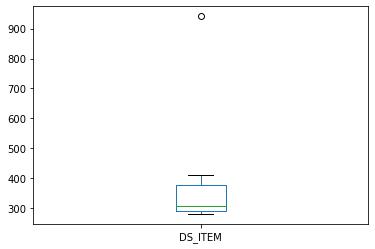

In [22]:
itens_mais_comprados.plot.box()
plt.show()

- Abaixo, observa-se o gráfico dos 10 itens mais comprados, com destaque aos 2 mais comprados de 2018

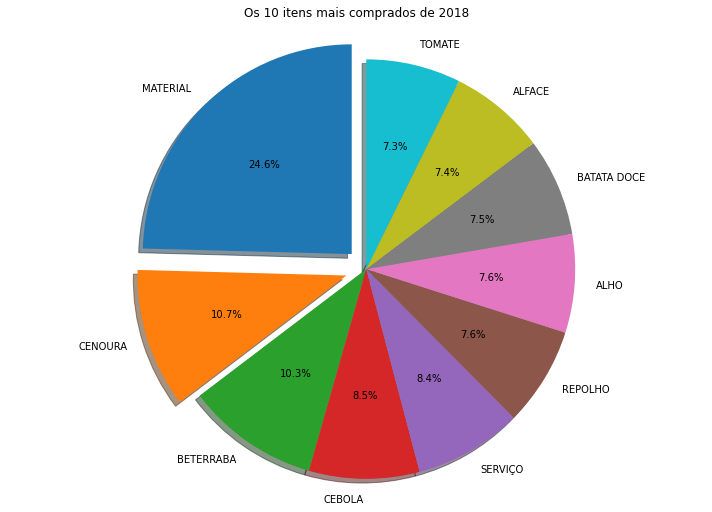

In [23]:
fig = plt.figure(figsize =(10, 7)) 
# o atributo explode indica que fatia do gráfico será destacada. No exemplo abaixo, serão a primeira e segunda fatia. A quantidade de valores é igual ao número de fatias do gráfico. 
explode = (0.1, 0.1, 0, 0, 0, 0, 0,0,0,0)


plt.pie(itens_mais_comprados, labels=itens_mais_comprados.index,autopct='%1.1f%%',explode=explode, shadow=True, startangle=90) 
#Centraliza o gráfico
plt.axis('equal')
#Ajusta o espaçamento para evitar o recorte do rótulo
plt.tight_layout()
plt.title('Os 10 itens mais comprados de 2018')
plt.show() 

- Validação do item mais vendido 

In [24]:
new_df[new_df['DS_ITEM']=='MATERIAL']

,CD_ORGAO,NR_LICITACAO,DS_ITEM,VL_UNITARIO_HOMOLOGADO,DS_OBJETO
230049,900,12.0,MATERIAL,71309.26,Aquisição de escâneres de mesa.
230052,900,12.0,MATERIAL,NaN,Aquisição de escâneres de mesa.
244897,900,5.0,MATERIAL,NaN,"Aquisição de lâmpadas de LED tubular, lâmpadas..."
268656,46700,11.0,MATERIAL,NaN,Aquisição de materiais para grelhas de caixas ...
287745,88031,8.0,MATERIAL,2090.00,Aquisição de materiais ambulatoriais a serem u...
...,...,...,...,...,...
701212,88031,12.0,MATERIAL,NaN,aquisição de blocos para serem utilizados pela...
701335,900,6.0,MATERIAL,52580.52,Aquisição de poltronas giratórias espaldar alt...
738451,900,9.0,MATERIAL,1108231.74,Aquisição de 469 impressoras laser monocromática.
738452,900,9.0,MATERIAL,61438.70,Aquisição de 469 impressoras laser monocromática.


- Numero de linhas sem valor para o item mais comprado

In [25]:
print(f"Número de itens sem valor: {new_df[new_df['DS_ITEM']=='MATERIAL']['VL_UNITARIO_HOMOLOGADO'].isna().sum()}")

Número de itens sem valor: 21


- Criação de um dataframe de Itens X Valor unitário homologado:

In [26]:
itens_comprados = new_df[['DS_ITEM', 'VL_UNITARIO_HOMOLOGADO']]
itens_comprados.head()

,DS_ITEM,VL_UNITARIO_HOMOLOGADO
0,"SUCATAS DE FERRO: cadeiras e mesas escolares,...",1102.5000
1,DESRATIZAÇÃO (GARANTIA DE 3 MESES – MÁXIMO),0.1000
2,DESINZETIZAÇÃO (GARANTIA DE 3 MESES – MÁXIMO),0.1175
3,HIGIENIZAÇÃO DOS RESERVATÓRIOS DE ÁGUA (GARANT...,0.0300
4,LIMPEZA FINAL DE OBRA,2.3000


- Verificação dos itens comprados com o valor zerado

In [27]:
itens_comprados.isna().sum()

DS_ITEM                        3
VL_UNITARIO_HOMOLOGADO    155598
dtype: int64

*Nota-se que há 15598 itens com valor zerado em VL_UNITARIO_HOMOLOGADO e 3 itens com valor zerado em DS_ITEM*

- Agrupamento dos itens 

In [28]:
valores_itens = itens_comprados.groupby(by=['DS_ITEM']).sum()
valores_itens

,VL_UNITARIO_HOMOLOGADO
DS_ITEM,
"\t\tTNT roxo, 1,40 de largura, rolo de 50 metros",91.98
\tADAPTADOR UNIVERSAL PARA FRASCO OU BOLSA PARA TRANSFERÊNCIA DE SOLUÇÃO.,0.77
\tATADURA GESSADA 15CM X 3M,3.00
"\tAntibiótico a base de Benzil Penicilina G Procaína. 10.000.000 UI Benzil Penicilina G Benzatina. 10.000.000 UI Diidroestreptomicina (Sulfato). 20,0g; frasco de 50 ml – Tipo Penfort PPU, Septipen.",25.00
"\tAquisição de 01 cobertura em aluzinco, medindo 7 metros de comprimento, 5 metros na lateral direita e 3 metros na lateral esquerda, com sustentação superior metálica (sem pilares na parte de baixo), no valor de R$ 3.500,00 (três mil e quinhentos reais).",0.00
...,...
"•\t250 (duzentas e cinquenta) unidades que contém 28 compartimentos para comprimidos, sendo 7 dias na semana. Produto livre de BPA; Composição: Polipropileno; Medidas: 21,5x12cm; Nichos: 3cm x 2,5cm.",0.00
"•\tCaracterísticas do Som: 2 P.A localizado na praça, sendo 04 pontos de som de no mínimo 1000W RMS cada, distribuídos da praça central até a Esquina Rua Dez de Novembro. 01 Mesa de som, no mínimo; 01 Amplificação para o sistema caso as caixas e retornos não possuírem a mesma; 04 microfones (02 com fio e 02 sem fio); 02 pedestais; Cabeamento necessário para interligação de todo o sistema (Microfones, instrumentos, potências, caixas, insert, energia e etc).",967.00
"•\tEletrocalha 100x50, com acessórios. •\tEletroduto, com acessórios. •\tCabo (UTP), 24AWG 250Mhz, categoria 6. •\tTomada RJ45, categoria 6, para eletroduto. •\tPatch cord ultra flexível, RJ 45 nas duas pontas, 1,4 M. •\tPatch cord ultra flexível, RJ 45 nas duas pontas, 3 M. •\tRack padrão 19’’ 16U. •\tGuia de cabos para rack, frontal, traseiro, vertical, superior. •\tSwitch 24 portas 10/100/1000 24P 10/100/1000 MBPS + 2 portas SFP GB – DN-SG1024. •\tBloco 110 para rack 19’’ 100 pares. •\tPatch panel 19’’, 24 portas, categoria 6. •\tPatch cord 110/RJ 45, 1 ponta de 1,5 M. •\tBuchas, parafusos, identificações. •\tDeslocamento/mão de obra/alimentação.",15000.00


- Os 30 itens com maior valor de compra:

In [29]:
itens_mais_vendidos_valor = valores_itens.sort_values(by= ['VL_UNITARIO_HOMOLOGADO'], ascending = False).head(10)
valores_itens.sort_values(by= ['VL_UNITARIO_HOMOLOGADO'], ascending = False).head(30)

,VL_UNITARIO_HOMOLOGADO
DS_ITEM,
"Alienação de direitos creditórios de propriedade do Estado do Rio Grande do Sul, oriundos do Fundo de Fomento Automotivo do Estado do Rio Grande do Sul - FOMENTAR/RS,",2.818000e+08
OBRAS E INSTALAÇÕES,5.629331e+07
"Execução das obras das redes coletoras, ramais prediais, estações de bombeamento e emissários da bacia do Arroio Pinheiro Torto, sistema de esgotamento sanitário do município de Passo Fundo/RS.",5.376739e+07
"Contratação de empresa - material - Contratação de empresa, por regime de empretada por preço global, para execução de obra de pavimentação asfáltica em diversas ruas do Município de Erechim, através da Secretaria Municipal de Obras Públicas e Habitação e recursos próprios. Valor do material R$ 10.839.032,49 Valor global R$ 12.691.685,09",4.335613e+07
OBRAS EM ANDAMENTO,4.281056e+07
"EXECUÇÃO DAS REDES DE ESGOTO DAS BACIAS 1A, 2A, 3A, 2B, 3B, 4B, 4E, RAMAIS, EEB’S E LINHAS DE RECALQUE 1A, 2A, 2B E 3 PARA O SISTEMA DE ESGOTAMENTO SANITÁRIO NO MUNICÍPIO DE SANTO ÂNGELO/RS.",3.805309e+07
"EXECUÇÃO DAS REDES COLETORAS, DOS RAMAIS PREDIAIS E DAS ELEVATÓRIAS DA BACIA SUL DO SES NO MUNICÍPIO DE SÃO BORJA/RS.",3.045016e+07
SERVIÇO,2.968182e+07
"PRESTAÇÃO DE OBRAS E SERVIÇOS DE ENGENHARIA COM AÇÕES DE CONTROLE DE VAZÃO E PRESSÃO, CONTROLE ATIVO DE VAZAMENTO E ADEQUAÇÃO DA INFRAESTRUTURA, VISANDO O AUMENTO DA EFICIÊNCIA OPERACIONAL NOS SISTEMAS DE ABASTECIMENTO DE ÁGUA DE SANTO ÂNGELO, IJUÍ, ALEGRETE E SANTIAGO",2.782196e+07


- Validação do item com maior valor de compra:

In [32]:
new_df[new_df['DS_ITEM']=='Alienação de direitos creditórios de propriedade do Estado do Rio Grande do Sul, oriundos do Fundo de Fomento Automotivo do Estado do Rio Grande do Sul - FOMENTAR/RS,']

,CD_ORGAO,NR_LICITACAO,DS_ITEM,VL_UNITARIO_HOMOLOGADO,DS_OBJETO
142761,88370,2.0,Alienação de direitos creditórios de proprieda...,281800000.0,Orteses/proteses.


- OBS: Observou-se que, o item mais comprado não é o item que possui maior valor de compra unitária, logo, deixo então, um dataframe com os itens mais vendidos (assim como solicitado), bem como um dataframe com os itens agrupados de maior valor unitário homologado que consta acima.

- Gráfico dos itens mais comprados por valor:

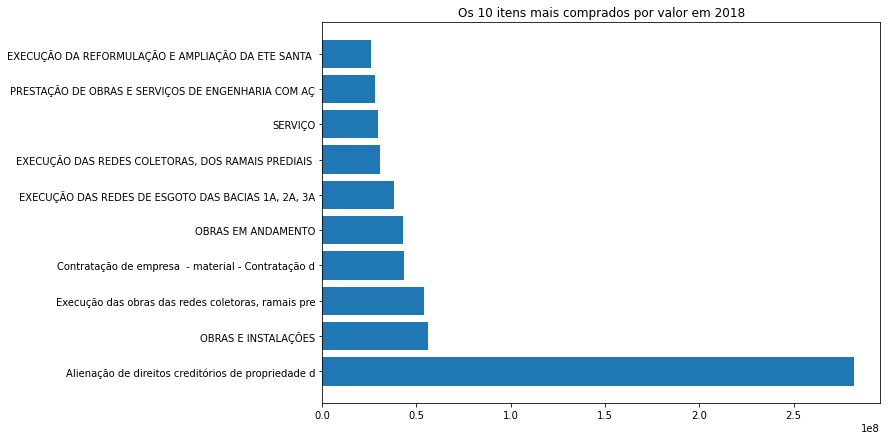

In [36]:
fig = plt.figure(figsize =(10, 7)) 
item_descricao = []
for i in itens_mais_vendidos_valor.index:
    item_descricao.append(i[0:50])

plt.barh(item_descricao,itens_mais_vendidos_valor['VL_UNITARIO_HOMOLOGADO'])
plt.title('Os 10 itens mais comprados por valor em 2018')
plt.show() 

- Agrupamento por Orgão

In [37]:
compras_por_orgao = new_df.groupby(by=['CD_ORGAO']).sum()
compras_por_orgao.drop(['NR_LICITACAO'], axis=1,inplace=True)
mais_comprados_por_orgao = compras_por_orgao.sort_values(by= ['VL_UNITARIO_HOMOLOGADO'], ascending = False).head(10)
mais_comprados_por_orgao

,VL_UNITARIO_HOMOLOGADO
CD_ORGAO,
8700,5.523296e+08
88370,2.948022e+08
46900,1.027695e+08
54900,5.075892e+07
55600,4.804152e+07
44300,4.342322e+07
900,3.891827e+07
59900,3.540424e+07
40400,2.656906e+07


- Gráfico contendo os códigos dos 10 órgãos que mais compraram (por valor):

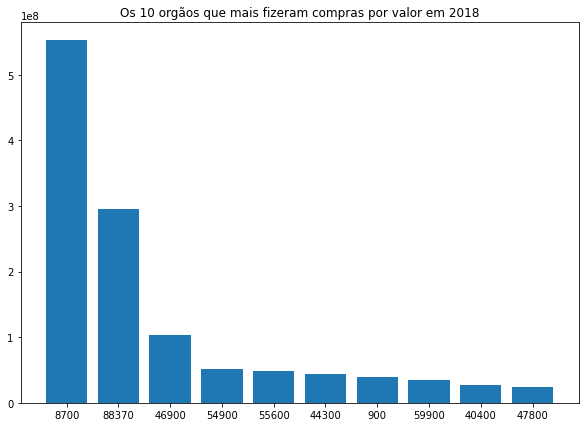

In [38]:
fig = plt.figure(figsize =(10, 7)) 
item_descricao = []
for i in mais_comprados_por_orgao.index:
    item_descricao.append(f'{i}')

plt.bar(item_descricao,mais_comprados_por_orgao['VL_UNITARIO_HOMOLOGADO'])
plt.title('Os 10 orgãos que mais fizeram compras por valor em 2018')
plt.show() 